In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("final2.csv")

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1004.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.280462,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.597290,23.310916,6.856959,0.253868,0.115820,0.700768,28.134937,2.104668,8.702952,168.453744,2.163875,91.249702,7.137529,9.192554
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,6.930000,17.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.205000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.618000,94.100000,5.211900,24.000000,666.000000,20.200000,396.230000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
data["AGE"].mean()

68.57490118577076

In [6]:
data["AGE"].max()

100.0

In [7]:
age = data["AGE"]

In [8]:
type(age)

pandas.core.series.Series

In [9]:
x = range(0,1011)

In [10]:
df_age = age.to_frame()

In [11]:
df_age

,AGE
0,65.2
1,78.9
2,61.1
3,45.8
4,54.2
...,...
1007,69.1
1008,76.7
1009,91.0
1010,89.3


KeyError: "None of [Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,\n            ...\n            1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],\n           dtype='int64', length=1011)] are in the [columns]"

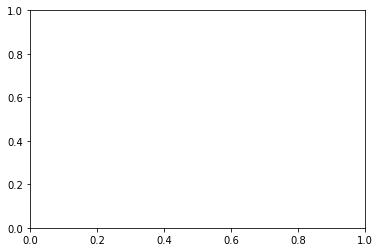

In [12]:
df_age.plot(x = x , y = "AGE",  kind = 'scatter')

In [ ]:
age.plot(style='.')

In [ ]:
max_thr = data['AGE'].quantile(0.95)

In [ ]:
data[data["AGE"]<max_thr]

In [ ]:
data

In [ ]:
min_th, max_th = data['AGE'].quantile([0.001,0.999])

In [ ]:
data[data["AGE"]<min_th]

In [ ]:
data[data["AGE"]<max_th]

In [ ]:
df = data[(data["AGE"]<max_th) & (data['AGE']>min_th)]

In [ ]:
df

In [ ]:
X = df.drop('MEDV', axis=1)

In [ ]:
X

In [ ]:
Y = df["MEDV"]

In [ ]:
X

In [ ]:
X.isna().sum()

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imp = SimpleImputer(strategy='median')

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestRegressor

In [ ]:
#model= LogisticRegression()
model = LinearRegression()
#model = RandomForestRegressor()

In [ ]:
my_pipe = make_pipeline(imp, model)

In [ ]:
df["CHAS"].value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='minority')

In [ ]:
X_sm, Y_sm = smote.fit_resample(X,Y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,Y, test_size= 0.2, random_state=5, stratify = df["CHAS"])

In [ ]:
my_pipe.fit(X_train, y_train)

In [ ]:
y_pred = my_pipe.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
mse